# HR Analytics Project- Understanding the Attrition in HR
## Problem Statement:
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and **how does HR Analytics help in analyzing attrition?** We will discuss the first question here and for the second question, **we will write the code and try to understand the process step by step.**

Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### Understanding - 
We have to predict the attrition in the company using the HR analytics and look at various factors which effect the attrition.

![](https://i.gyazo.com/5ad8a6123e3c113e48128b93f67c3870.png)

In [2]:
'''Importing important libraries'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"D:\Downloads\IDM Downloads\hr-attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In the above dataset, we see that the Attrition is the target variable. We have to predict whether the given employee leave the job or not. In other words we have to predict the attrition of the employee. So we have a Supervised problem at our hand, Classification problem at that.
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
# Exploratory Data Analysis:
We start the EDA with looking at the dimensions of the data that we hae with us. After that we will perform various operations on the dataset and note the insights from the data repectively.

In [4]:
print(f"The dimensions of the dataset is: {data.shape}")

The dimensions of the dataset is: (1470, 35)


We have a total of 1470 employee data, where 34 factors affect present which will effect the target variable which is 'Attrition'.

In [5]:
ds = data.copy()
ds.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In the given dataset for HR Analytics, *the feature 'EmployeeCount', 'Over18', 'StandardHours' are constant.* They have only 1 value. On the other hand, *the feature 'EmployeeNumber' is completely unique* and has 1470 different values. **These four values will be dropped from the dataset.**

In [6]:
ds.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace = True)
print(f"New shape of the dataset is {ds.shape}")

New shape of the dataset is (1470, 31)


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Null Values Handling:
We see from info() that no null values are present in the data. We will also visualise it using a heatmap.

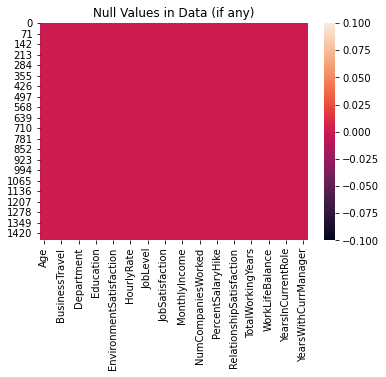

In [9]:
sns.heatmap(ds.isnull())
plt.title('Null Values in Data (if any)')
plt.show()

As we see that no null values are present in the dataset.

In [10]:
print(f"Value count of total dtypes of features is: \n{ds.dtypes.value_counts()}")

Value count of total dtypes of features is: 
int64     23
object     8
dtype: int64


We have a total of *24 continous features which are of int64 data type and 8 categorical features which are of object data type.* **Before encoding the categorical features, we perform the descriptive statistics on the continous variables.**
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
## Descriptive Statistics:

In [11]:
pd.set_option('display.max_columns', None) # To display all the features in the notebook.
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Insights can be drawn from the above descriptive statistics

1. Minimum age of the employees is 18 years, maximum age of the employee in given dataset is 60 years.
2. Minimum daily rate of the employee is 102, maximum is 1499. The mean daily rate is 802.49.
3. Minimum ditance from work to home is 1 kms, maximum is 29 kms. The average distance is 9.19 kms.
4. Minimum hourly rate of the employee is 102, maximum is 1499. The mean hourly rate is 802.49.
5. Minimum monthly income is 1009, maximum is 19999. Average monthly income is 6502.93
6. Minimum monthly rate of the employee is 102, maximum is 1499. The mean monthly rate is 802.49.
6. The maximum number of companies in which an employee has worked is 9. Minimum is 0.
7. Highest percentage in salary hike is 25%. Lowest hike is 11%.
8. Maximum total working years is 40, minimum is 0. Mean working years is 11.27. Similarly maximum years at company is 40 years and minimun is 0. Mean years at company is 7 years.

## Outlier - Detection and Removal:
We can also draw the information *from the descriptive statistics that the outliers may not be present in the dataset.* For checking, we first draw the boxplots of the continous features-

<AxesSubplot:>

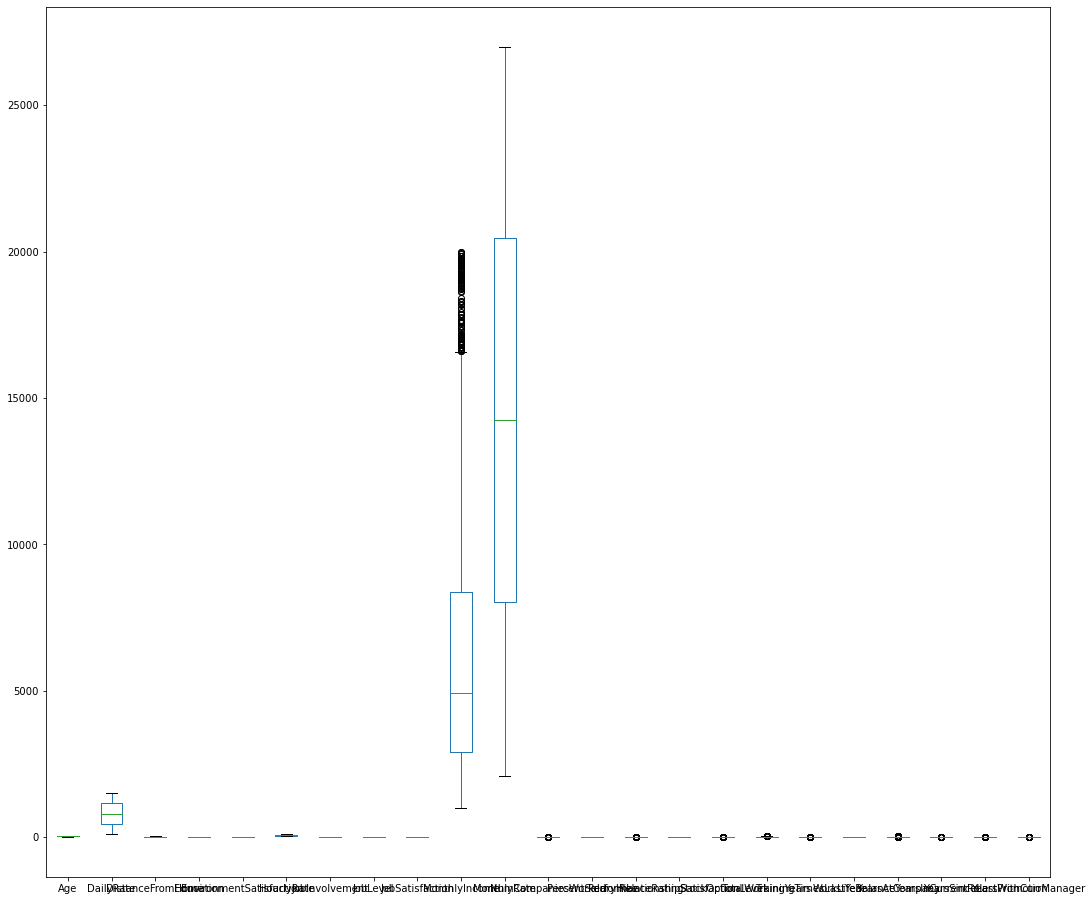

In [12]:
ds.plot.box(figsize = (18, 16))

We see that the outliers may only be present in one feature 'MonthlyIncome'. We will draw just its plot to visualise it better.

<AxesSubplot:>

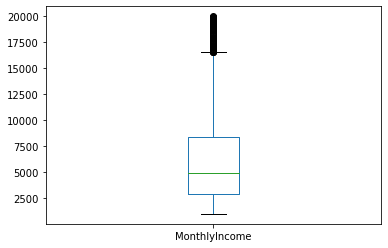

In [13]:
ds['MonthlyIncome'].plot.box()

We see that *some outliers are shown in the boxplot for 'MonthlyIncome'.* First, **check if any outliers are present using z-score**. ***if present, we replace the outliers in the monthly income feature with the median of the column while grouping it by job level.***

In [14]:
from scipy.stats import zscore
zabs = np.abs(zscore(ds['MonthlyIncome']))
loc1 = np.where(zabs>3)
np.shape(loc1)

(1, 0)

*There is no value for z-score which is above than 3 or less that -3.* Hence, **no outliers are present in the data. So their treatment is not required.**
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
## Encoding of Categorical Features:
Now we move towards the encoding of the categorical values. **we encode the ordinal values using label encoder and nominal values with frequency encoding and one hot encoding.** *'OverTime' and 'Attrition' are ordinal values, and rest categorical values are nominal values.*

### Ordinal Encoding:
first we encode the ordinal values.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['OverTime'] = le.fit_transform(ds['OverTime'])
ds['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [16]:
ds['Attrition'] = le.fit_transform(ds['Attrition'])
ds['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Frequency Encoding:
If we perform one hot encoding for the nominal categorical values, then there will be 51 columns present in the dataset. As a result, the curse of dimensionality will occur. Hence in order to encode these nominal values, we will use frequency encoding.

In [17]:
ds.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7


In [18]:
BusinessTravel_enc = (ds.groupby('BusinessTravel').size()) / len(ds)
print(BusinessTravel_enc)

''' OR 
BusinessTravel_freqmap = ds['BusinessTravel'].value_counts().to_dict()
BusinessTravel_freqmap'''

ds['BusinessTravel_enc'] = ds['BusinessTravel'].apply(lambda x : BusinessTravel_enc[x])
ds['BusinessTravel_enc'].head(3)

BusinessTravel
Non-Travel           0.102041
Travel_Frequently    0.188435
Travel_Rarely        0.709524
dtype: float64


0    0.709524
1    0.188435
2    0.709524
Name: BusinessTravel_enc, dtype: float64

As we see above that **we have encoded the nominal values in 'BuisnessTravel' according to the the frequency of the feature values**. We will similarly encode all the other values.

In [19]:
Department_enc = (ds.groupby('Department').size()) / len(ds)
print(Department_enc)
ds['Department_enc'] = ds['Department'].apply(lambda x : Department_enc[x])
ds['Department_enc'].head(3)

Department
Human Resources           0.042857
Research & Development    0.653741
Sales                     0.303401
dtype: float64


0    0.303401
1    0.653741
2    0.653741
Name: Department_enc, dtype: float64

In [20]:
EducationField_enc = (ds.groupby('EducationField').size()) / len(ds)
print(EducationField_enc)
ds['EducationField_enc'] = ds['EducationField'].apply(lambda x : EducationField_enc[x])
ds['EducationField_enc'].head(3)

EducationField
Human Resources     0.018367
Life Sciences       0.412245
Marketing           0.108163
Medical             0.315646
Other               0.055782
Technical Degree    0.089796
dtype: float64


0    0.412245
1    0.412245
2    0.055782
Name: EducationField_enc, dtype: float64

In [21]:
JobRole_enc = (ds.groupby('JobRole').size()) / len(ds)
print(JobRole_enc)
ds['JobRole_enc'] = ds['JobRole'].apply(lambda x : JobRole_enc[x])
ds['JobRole_enc'].head(3)

JobRole
Healthcare Representative    0.089116
Human Resources              0.035374
Laboratory Technician        0.176190
Manager                      0.069388
Manufacturing Director       0.098639
Research Director            0.054422
Research Scientist           0.198639
Sales Executive              0.221769
Sales Representative         0.056463
dtype: float64


0    0.221769
1    0.198639
2    0.176190
Name: JobRole_enc, dtype: float64

Once we have frequency encoded these values, we can drop the original feature from the data.

In [22]:
ds.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole'], axis = 1, inplace = True)

### One hot encoding:
Now we will encode the remaning features which are 'Gender' and 'MaritalStatus' using the one hot encoding.

In [23]:
ds = pd.get_dummies(ds)
ds.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_enc,Department_enc,EducationField_enc,JobRole_enc,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.709524,0.303401,0.412245,0.221769,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0.188435,0.653741,0.412245,0.198639,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0.709524,0.653741,0.055782,0.176190,0,1,0,0,1


Finally we drop one column from each one hot encode feature to get the final dataset.

In [24]:
ds.drop(['Gender_Male', 'MaritalStatus_Divorced'], axis = 1, inplace = True)
print(f"The new shape of the dataset is: {ds.shape}")

The new shape of the dataset is: (1470, 32)


We have now encoded all the categorical values of the dataset such that it can be used for the model building and learning.
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
## Scaling:
As we see now that the *dataset have different scales of values. So it is important to scale the data before moving further*. **We will use the Min-Max scaler to scale the data.** We will only scale the attributes and not the target variable.

In [25]:
y = ds.loc[:,'Attrition']
ds.drop(['Attrition'], axis = 1, inplace = True)
ds1 = pd.concat([ds,y], axis = 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
ds1.loc[:,"Age":"MaritalStatus_Single"] = scale.fit_transform(ds1.loc[:,"Age":"MaritalStatus_Single"])
ds1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_enc,Department_enc,EducationField_enc,JobRole_enc,Gender_Female,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1.000000,0.426503,1.000000,1.000000,1.0,0.0,1.0,1
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.142217,1.000000,1.000000,0.875912,0.0,1.0,0.0,0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.000000,1.000000,0.094991,0.755474,0.0,0.0,1.0,1
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.142217,1.000000,1.000000,0.875912,1.0,1.0,0.0,0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.000000,1.000000,0.754750,0.755474,0.0,1.0,0.0,0


As we see that we have obtained the scaled data. This data can now be used for the model building.
## Feature Selection:
### Mutual Information of Features:
We check the mutual information gain of these features to see which columns are most necessary and which columns are less necessary.

In [28]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(ds1.loc[:,"Age":"MaritalStatus_Single"], ds1.loc[:,'Attrition'], 
                                                 test_size = 0.33, random_state = 40)

In [29]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

MonthlyIncome               0.039726
OverTime                    0.032232
TotalWorkingYears           0.026019
Age                         0.024959
JobRole_enc                 0.021567
JobLevel                    0.020736
MaritalStatus_Single        0.020221
BusinessTravel_enc          0.018044
StockOptionLevel            0.013708
PerformanceRating           0.013214
YearsWithCurrManager        0.012083
DailyRate                   0.011181
MaritalStatus_Married       0.010781
TrainingTimesLastYear       0.010427
MonthlyRate                 0.009135
WorkLifeBalance             0.007227
RelationshipSatisfaction    0.007148
EducationField_enc          0.006948
Department_enc              0.003399
YearsInCurrentRole          0.002425
Gender_Female               0.001410
DistanceFromHome            0.000954
JobSatisfaction             0.000275
PercentSalaryHike           0.000000
YearsSinceLastPromotion     0.000000
YearsAtCompany              0.000000
JobInvolvement              0.000000
H

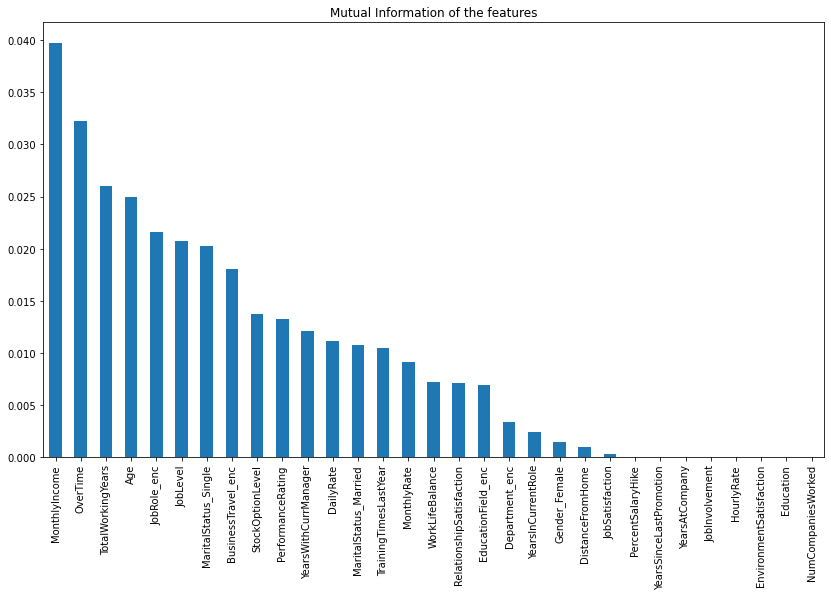

In [31]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (14,8))
plt.title("Mutual Information of the features")
plt.show()

From the above plot, we seen that the *mutual information of features 'TrainingTimesLastYear', 'JobSatisfaction', 'HourlyRate', 'JobInvolvement', 'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction' is 0*. **But since we have less features and these are correlated with other features, we will not remove them from the dataset.**
## Correlation:
Now we look at the correlation between the features of the target.

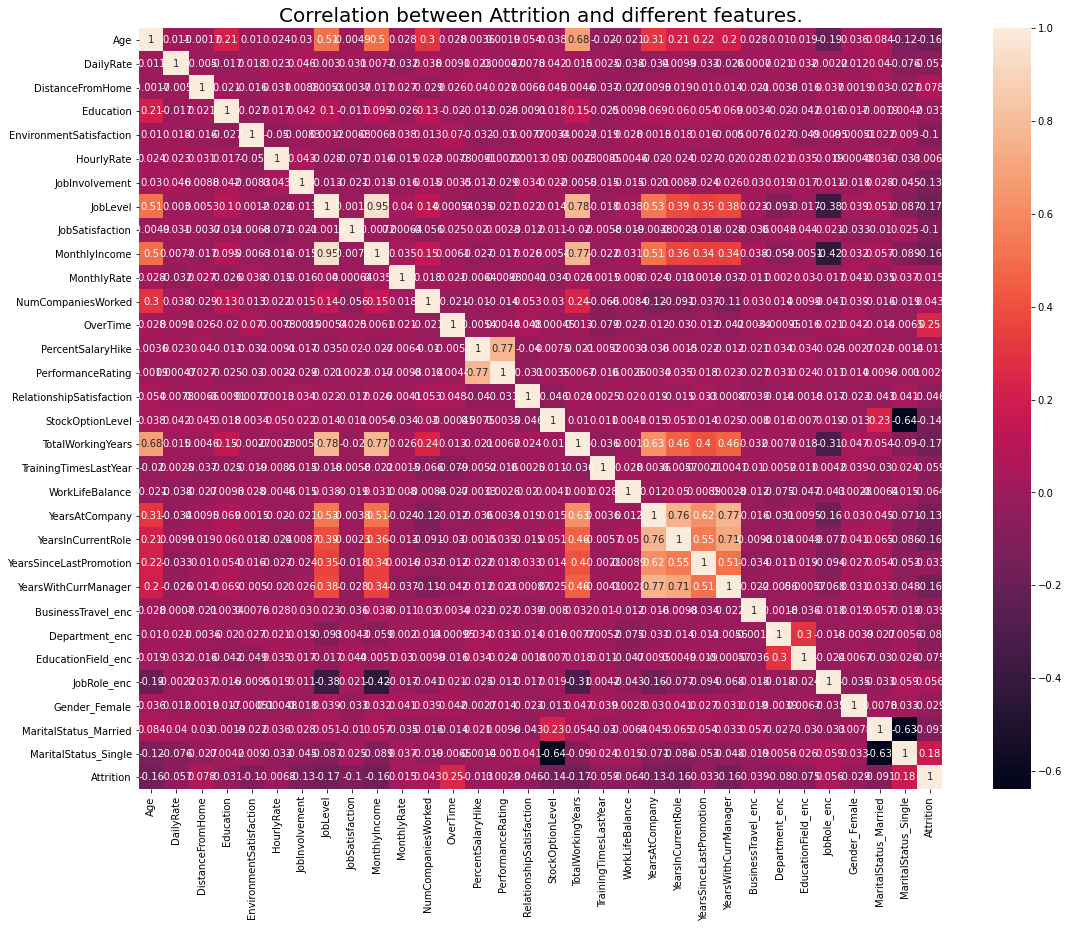

In [32]:
plt.figure(figsize = (18,14))
plt.title("Correlation between Attrition and different features.", fontsize = 20)
sns.heatmap(ds1.corr(), annot = True)
plt.show()

It is not possible to clearly visualise the correlation between features and target. So we will us the correlation matrix to get a better idea of the features.

In [33]:
corr = ds1.corr()
target_corr = corr.loc[:,'Attrition']
target_corr.sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus_Single        0.175419
DistanceFromHome            0.077924
JobRole_enc                 0.056451
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Gender_Female              -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
BusinessTravel_enc         -0.038880
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EducationField_enc         -0.074756
Department_enc             -0.079964
MaritalStatus_Married      -0.090984
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

**'OverTime' has the highest positive correlation with the Attrition of employees.** whereas **'TotalWorkingYears' has the highest negative correlation with the Attrition. Lowest correlation is given by 'PerformanceRating' and 'HourlyRate' features.**  other than that, **'JobLevel' and 'MonthlyIncome' has the highest correlation with each other.**
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
## Data Imbalance:
We check if the dataset is balanced or imbalanced.

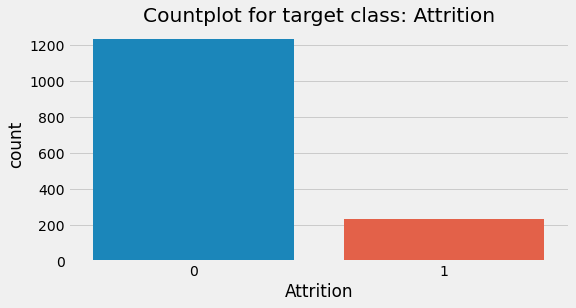

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4))
plt.title("Countplot for target class: Attrition")
sns.countplot(data = ds1, x = 'Attrition')
plt.show()

We see that the *data is heavily imbalanced with majority of target values as 0 or No.* If we train the model on this dataset, then it will result in overfiting and thus the model will not perform well. In order to **avoid the overfitting, we balance the dataset using SMOTETomek**

In [35]:
from imblearn.combine import SMOTETomek
x = ds1.loc[:,"Age":"MaritalStatus_Single"]
y = ds1.loc[:,"Attrition"]
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)
print(x_new.shape, y_new.shape)

(2466, 31) (2466,)


We see that the shape of the dataset has been changed. We again visualise to see the data imbalance.

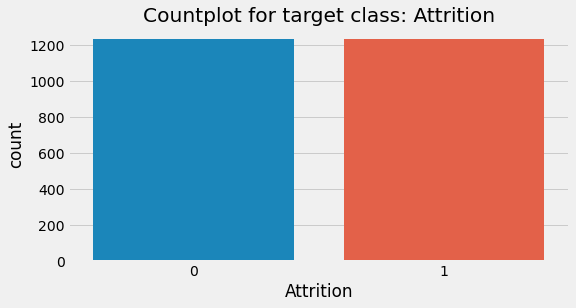

In [36]:
ds2 = pd.concat([x_new, y_new], axis = 1)
plt.figure(figsize = (8, 4))
plt.title("Countplot for target class: Attrition")
sns.countplot(data = ds2, x = 'Attrition')
plt.show()

We see that the **data imbalance is now removed and we have equal values of 0 and 1 for Attrition as a result of oversampling.** This data can now be given to the model for the training and testing purpose.
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
# MODEL BUILDING:
## Best Random State:
Before fitting the data into the model, *we need to split the training and testing data*. For the splitting of the data, *we will find out the best random state using a simple code.*

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.33, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}")

Best Random State is 138


From the above code, we have the best Random state as 138. So we will use this to split the data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.33, random_state = 138)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1652, 31) (814, 31) (1652,) (814,)


## Model Selection:
The problem is a classification problem. So we need to select a model which is a classification model. *We find out the best model among Logistic Regressor, Decision Tree Classifier, KNN Classifier, SVC Classifier, Random Forest Classifier, Adaboost Classifier, and MultinomialNB*. **We fit the training and testing data one by one into the models and compare their accuracy score.**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [46]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 81.81818181818183
Accuracy Score of Decision Tree Classifier model is 85.38083538083538
Accuracy Score of K-Nearest Neighbour Classifier model is 81.57248157248156
Accuracy Score of Support Vector Classifier model is 89.68058968058969
Accuracy Score of Random Forest model is 93.85749385749385
Accuracy Score of MultinomialNB model is 73.83292383292384
Accuracy Score of ADA Boost model is 91.4004914004914


We see that *we are getting the most accuracy for the Random Forest Model*. But this could be due to overfitting or bias.

## Cross Validation:
In order **to avoid the overfitting or bias, we cross validate the models** and *compare the mean accuracy scores. The model where the difference between accuracy and mean accuracy is the least is the best model.*

In [47]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 5)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 5)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 5)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.78947368 0.7854251  0.7854251  0.7854251  0.82186235 0.79352227
 0.74390244 0.79674797 0.81707317 0.75609756]
Mean of accuracy scores is for Logistic Regression is 78.74954741450249

[0.69635628 0.74493927 0.89473684 0.88259109 0.89878543 0.91497976
 0.89430894 0.90243902 0.89837398 0.90650407]
Mean of accuracy scores is for Decision Tree Classifier is 86.34014680227776

[0.80566802 0.83805668 0.84615385 0.83805668 0.81781377 0.84615385
 0.83739837 0.77235772 0.83739837 0.82113821]
Mean of accuracy scores is for KNN Classifier is 82.60195516934927

[0.85425101 0.87449393 0.93522267 0.91497976 0.91902834 0.90283401
 0.8699187  0.90243902 0.91463415 0.87398374]
Mean of accuracy scores is for SVC Classifier is 89.61785326355287

[0.76923077 0.97768763 0.97363083 0.96348884 0.96754564]
Mean of accuracy scores is for Random Forest Classifier is 93.03167420814479

[0.69838057 0.70385396 0.7505071  0.72210953 0.74239351]
Mean of accuracy scores is for MultinomialNB is 72.34489328329406

[0

In [48]:
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 3.06863440367934
Decision Tree Classifier -0.9593114214423792
KNeighbors Classifier -1.0294735968677031
SVC 0.06273641703681676
Random Forest Classifier 0.8258196493490573
MultinomialNB 1.4880305496297836
ADA Boost Classifier 4.691012132028462


From the above results we see that the *least possible difference is for the Decision Tree Classifier*. *Maximum possible accuracy was for Random forest classifier*. So we tune both the models to compare.
## Hyperparameter Tuning:
we will tune the parameters of the models.
### Tuning Decision Tree-

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Decision Tree Tuning
dtc = DecisionTreeClassifier()
parameters = { 'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20]}
gs = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = 'f1', cv = 5)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.848783453750585
{'criterion': 'gini', 'max_depth': 12}


Using these parameters to build the model.

In [51]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 12)
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
pred_dtc = dtc.predict(x_test)

0.9975786924939467


We have a score of 0.99 for Decision Tree.

### Tuning Random Forest-

In [52]:
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.927917700550837
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}


We will now build the Random forest model using these parameters.

In [53]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 200)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

1.0


we see that we have a score of 1 for Random Forest Classifier.
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
# Model Evaluation:
we have built both of the DTC and RFC models using their respective best parameters. Now **we evaluate these models using the cunfusion matrix, classification report and the ROC curve on same testing data to see that which model gives us the best possible results**
### Decision Tree Evaluation-

In [55]:
plt.style.use('default')

Accuracy Score of DTC model is 0.8439803439803439
Confusion matrix for DTC Model is
[[343  63]
 [ 64 344]]
Classification Report of the DTC Model is
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       406
           1       0.85      0.84      0.84       408

    accuracy                           0.84       814
   macro avg       0.84      0.84      0.84       814
weighted avg       0.84      0.84      0.84       814



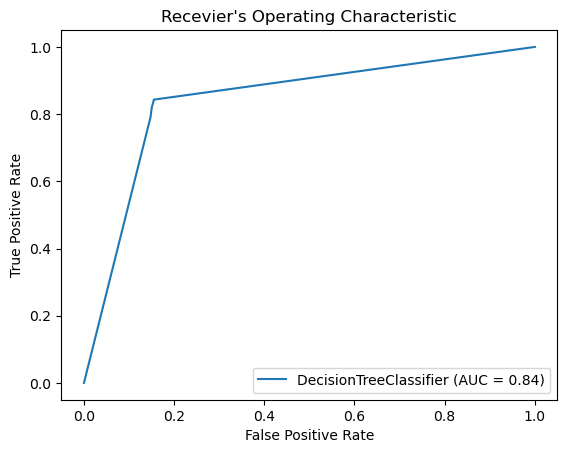

In [56]:
print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc))
print("Confusion matrix for DTC Model is")
print(confusion_matrix(y_test, pred_dtc))
print("Classification Report of the DTC Model is")
print(classification_report(y_test, pred_dtc))

plot_roc_curve(dtc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

From the above evaluation we see that the **decision tree has the AUC score of 0.84**. It has ***Precision and Recall of 0.84 and 0.85 for both target class. We have got the f1 score as 0.84.***
### Random Forest Evaluation-

Accuracy Score of RFC model is 0.9361179361179361
Confusion matrix for RFC Model is
[[392  14]
 [ 38 370]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       406
           1       0.96      0.91      0.93       408

    accuracy                           0.94       814
   macro avg       0.94      0.94      0.94       814
weighted avg       0.94      0.94      0.94       814



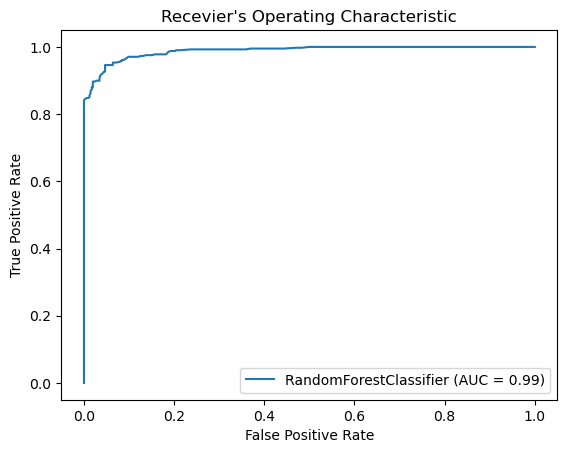

In [57]:
print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc))
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

From the above evaluation we see that the **Random Forest has the AUC score of 0.99**. It has ***Precision and Recall of 0.91 and 0.97 for both target class. We have got the f1 score as 0.94.***

We see that *out of Random Forest classifier and Decision Tree Classifier*, **We get the best perfromance by the Random Forest Model. So it will be used for the serialisation.**
![](https://miro.medium.com/max/2400/1*IH10jlQEJ7GW1_oq8s7WPw.png)
# Serialisation:
Now that we have made the model, we can use it for prediction after saving it as an object.

In [58]:
import joblib
joblib.dump(rfc, 'HR Attrition Prediction.obj') # saving the model as an object

['HR Attrition Prediction.obj']

![](https://i.gyazo.com/5ad8a6123e3c113e48128b93f67c3870.png)
# Conclusion:
In this case study, we needed to build the model for prediction of Attrition in HR. We are given a dataset and we had to predict if a person will leave the company or not.

Many attributes of the data were categorical and they were encoded using label encoding, frequency encoding and one hot encoding. No outliers were found in the data during EDA process. The scaling of the data was done using Min-Max scaler before using the data for model building.

7 models we selected for the model building namely Logistic Regressor, Decision Tree Classifier, KNN Classifier, SVC Classifier, Random Forest Classifier, Adaboost Classifier, and MultinomialNB. These models are cross validated to look for the best possible  model with highest mean accuracy. Two models Decision Tree and Random Forest were selected for the tuning after cross validation.

After the tuning, Model Evaluation was done using classification report, confusion matrix and ROC curve. Random Forest gave the best preformance with AUC score of 0.99 and f1 score of 0.94. It is then saved as an object to use for prediction.